# Text Data: Flattening, Filtering, and Chunking

What would you do if you were designing an algorithm to analyze the following paragraph of text?

    Emma knocked on the door. No answer. She knocked again and waited. There was a large maple tree next to the house. Emma looked up the tree and saw a giant raven perched at the treetop. Under the afternoon sun, the raven gleamed magnificently. Its beak was hard and pointed, its claws sharp and strong. It looked regal and imposing. It reigned the tree it stood on. The raven was looking straight at Emma with its beady black eyes. Emma felt slightly intimidated. She took a step back from the door and tentatively said, “Hello?”

The paragraph contains a lot of information. We know that it involves someone named Emma and a raven. There is a house and a tree, and Emma is trying to get into the house but sees the raven instead. The raven is magnificent and has noticed Emma, who is a little scared but is making an attempt at communication.

So, which parts of this trove of information are salient features that we should extract? To start with, it seems like a good idea to extract the names of the main characters, Emma and the raven. Next, it might also be good to note the setting of a house, a door, and a tree. And what about the descriptions of the raven? What about Emma’s actions—knocking on the door, taking a step back, and saying hello?

This chapter introduces the basics of feature engineering for text. We start out with bag-of-words, which is the simplest representation based on word count statistics. A very much related transformation is tf-idf, which is essentially a feature scaling technique. It is pulled out into its own chapter (the next one) for a full discussion. The current chapter first talks about text extraction features, then delves into how to filter and clean those features.

# Bag-of-X: Turning Natural Text into Flat Vectors

Whether constructing machine learning models or engineering features, it’s nice when the result is simple and interpretable. Simple things are easy to try, and interpretable features and models are easier to debug than complex ones. Simple and interpretable features do not always lead to the most accurate model, but it’s a good idea to start simple and only add complexity when absolutely necessary.
For text data, we can start with a list of word count statistics called a bag-of-words. A list of word counts makes no special effort to find the interesting entities, such as Emma or the raven. But those two words are repeatedly mentioned in our sample paragraph, and they have a higher count than a random word like “hello.” For simple tasks such as classifying a document, word count statistics often suffice. This technique can also be used in information retrieval, where the goal is to retrieve the set of documents that are relevant to an input text query. Both tasks are well served by word-level features because the presence or absence of certain words is a great indicator of the topic content of the document.

Bag-of-Words

In bag-of-words (BoW) featurization, a text document is converted into a vector of counts. (A vector is just a collection of n numbers.) The vector contains an entry for every possible word in the vocabulary. If the word—say, “aardvark”—appears three times in the document, then the feature vector has a count of 3 in the position corresponding to that word. If a word in the vocabulary doesn’t appear in the document, then it gets a count of 0. For example, the text “it is a puppy and it is extremely cute” has the BoW representation shown in Figure 3-1.



 <img src="feml_0301.png" height="360" width="360"> 

Bag-of-words converts a text document into a flat vector. It is “flat” because it doesn’t contain any of the original textual structures. The original text is a sequence of words. But a bag-of-words has no sequence; it just remembers how many times each word appears in the text. Thus, as Figure 3-2 demonstrates, the ordering of words in the vector is not important, as long as it is consistent for all documents in the dataset. Neither does bag-of-words represent any concept of word hierarchy. For example, the concept of “animal” includes “dog,” “cat,” “raven,” etc. But in a bag-of-words representation, these words are all equal elements of the vector.


 <img src="feml_0302.png" height="360" width="360"> 

What is important here is the geometry of data in feature space. In a bag-of-words vector, each word becomes a dimension of the vector. If there are n words in the vocabulary, then a document becomes a point1 in n-dimensional space. It is difficult to visualize the geometry of anything beyond two or three dimensions, so we will have to use our imagination. Figure 3-3 shows what our example sentence looks like in the two-dimensional feature space corresponding to the words “puppy” and “cute.”

<img src="feml_0303.png" height="360" width="360"> 

Figure 3-4 shows three sentences in a 3D space corresponding to the words “puppy,” “extremely,” and “cute.”

<img src="feml_0304.png" height="360" width="360"> 


These figures both depict data vectors in feature space. The axes denote individual words, which are features in the bag-of-words representation, and the points in space denote data points (text documents). Sometimes it is also informative to look at feature vectors in data space. A feature vector contains the value of the feature in each data point. The axes denote individual data points, and the points denote feature vectors. Figure 3-5 shows an example. With bag-of-words featurization for text documents, a feature is a word, and a feature vector contains the counts of this word in each document. In this way, a word is represented as a “bag-of-documents.”  As we shall see in Chapter 4, these bag-of-documents vectors come from the matrix transpose of the bag-of-words vectors.

<img src="feml_0305.png" height="360" width="360"> 

Bag-of-words is not perfect. Breaking down a sentence into single words can destroy the semantic meaning. For instance, “not bad” semantically means “decent” or even “good” (especially if you’re British). But “not” and “bad” constitute a floating negation plus a negative sentiment. “toy dog” and “dog toy” could be very different things (unless it’s a dog toy of a toy dog), and the meaning is lost with the singleton words “toy” and “dog.” It’s easy to come up with many such examples. Bag-of-n-Grams, which we discuss next, alleviates some of the issue but is not a fundamental fix. It’s good to keep in mind that bag-of-words is a simple and useful heuristic, but it is far from a correct semantic understanding of text.

## Bag-of-n-Grams

Bag-of-n-Grams, or bag-of-n-grams, is a natural extension of bag-of-words. An n-gram is a sequence of n tokens. A word is essentially a 1-gram, also known as a unigram. After tokenization, the counting mechanism can collate individual tokens into word counts, or count overlapping sequences as n-grams. For example, the sentence “Emma knocked on the door” generates the n-grams “Emma knocked,” “knocked on,” “on the,” and “the door.”

n-grams retain more of the original sequence structure of the text, and therefore the bag-of-n-grams representation can be more informative. However, this comes at a cost. Theoretically, with k unique words, there could be k2 unique 2-grams (also called bigrams). In practice, there are not nearly so many, because not every word can follow every other word. Nevertheless, there are usually a lot more distinct n-grams (n > 1) than words. This means that bag-of-n-grams is a much bigger and sparser feature space. It also means that n-grams are more expensive to compute, store, and model. The larger n is, the richer the information, and the greater the cost.

To illustrate how the number of n-grams grows with increasing n (see Figure 3-6), let’s compute n-grams on the Yelp reviews dataset. 

In [ ]:
import pandas as pd
import json

In [ ]:
biz_f = open('data/yelp/v6/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_f.readlines()])
biz_f.close()
biz_df.shape

In [ ]:
biz_df

In [ ]:
# Load the first 10,000 reviews
f = open('data/yelp/v6/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json')
js = []
for i in range(10000):
    js.append(json.loads(f.readline()))
f.close()
review_df = pd.DataFrame(js)
review_df.shape

In [ ]:
review_df

In [ ]:
review_df['text'][0]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow_converter = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')

In [ ]:
x = bow_converter.fit_transform(review_df['text'])
x

In [ ]:
words = bow_converter.get_feature_names()
len(words)

In [ ]:
words[:10]

In [ ]:
bigram_converter = CountVectorizer(ngram_range=(2,2), token_pattern='(?u)\\b\\w+\\b')
x2 = bigram_converter.fit_transform(review_df['text'])

In [ ]:
bigrams = bigram_converter.get_feature_names()
len(bigrams)

In [ ]:
bigrams[-10:]

In [ ]:
trigram_converter = CountVectorizer(ngram_range=(3,3), token_pattern='(?u)\\b\\w+\\b')
x3 = trigram_converter.fit_transform(review_df['text'])

In [ ]:
trigrams = trigram_converter.get_feature_names()
len(trigrams)

In [ ]:
trigrams[:10]

In [ ]:
print (len(words), len(bigrams), len(trigrams))

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style("darkgrid")
counts = [len(words), len(bigrams), len(trigrams)]
plt.plot(counts, color='cornflowerblue')
plt.plot(counts, 'bo')
plt.margins(0.1)
plt.xticks(range(3), ['unigram', 'bigram', 'trigram'])
plt.tick_params(labelsize=14)
plt.title('Number of ngrams in the first 10,000 reviews of the Yelp dataset', {'fontsize':16})
plt.show()

## Filtering for Cleaner Features

With words, how do we cleanly separate the signal from the noise? Through filtering, techniques that use raw tokenization and counting to generate lists of simple words or n-grams become more usable. Phrase detection, which we will discuss next, can be seen as a particular bigram filter. Here are a few more ways to perform filtering.

### Stopwords

Classification and retrieval do not usually require an in-depth understanding of the text. For instance, in the sentence “Emma knocked on the door,” the words “on” and “the” don’t change the fact that this sentence is about a person and a door. For coarse-grained tasks such as classification, the pronouns, articles, and prepositions may not add much value. The case may be very different in sentiment analysis, which requires a fine-grained understanding of semantics.

The popular Python NLP package NLTK contains a linguist-defined stopword list for many languages. (You will need to install NLTK and run nltk.download() to get all the goodies.) Various stopword lists can also be found on the web. For instance, here are some sample words from the English stopword list:

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('spanish')

Note that the list contains apostrophes, and the words are uncapitalized. In order to use it as is, the tokenization process must not eat up apostrophes, and the words need to be converted to lowercase.

## Frequency-Based Filtering

Stopword lists are a way of weeding out common words that make for vacuous features. There are other, more statistical ways of getting at the concept of “common words.” In collocation extraction, we see methods that depend on manual definitions, and those that use statistics. The same idea applies to word filtering. We can use frequency statistics here as well.

### Frequent words

Frequency statistics are great for filtering out corpus-specific common words as well as general-purpose stopwords. For instance, the phrase “New York Times” and each of the individual words in it appear frequently in the New York Times Annotated Corpus dataset. Similarly, the word “house” appears often in the phrase “House of Commons” in the Hansard corpus of Canadian parliament debates, a dataset that is popularly used for statistical machine translation because it contains both an English and a French version of all documents. These words are meaningful in general, but not within those particular corpora. A typical stopword list will catch the general stopwords, but not corpus-specific ones.

Looking at the most frequent words can reveal parsing problems and highlight normally useful words that happen to appear too many times in the corpus. For example, Table 3-1 lists the 40 most frequent words in the Yelp reviews dataset. Here, frequency is based on the number of documents (reviews) they appear in, not their count within a document. As we can see, the list includes many stopwords. It also contains some surprises. “s” and “t” are on the list because we used the apostrophe as a tokenization delimiter, and words such as “Mary’s” or “didn’t” got parsed as “Mary s” and “didn t.” Furthermore, the words “good,” “food,” and “great” each appear in around a third of the reviews, but we might want to keep them around because they are very useful for tasks such as sentiment analysis or business categorization.

In practice, it helps to combine frequency-based filtering with a stopword list. There is also the tricky question of where to place the cutoff. Unfortunately there is no universal answer. Most of the time the cutoff needs to be determined manually, and may need to be reexamined when the dataset changes.

### Rare words

Depending on the task, one might also need to filter out rare words. These might be truly obscure words, or misspellings of common words. To a statistical model, a word that appears in only one or two documents is more like noise than useful information. For example, suppose the task is to categorize businesses based on their Yelp reviews, and a single review contains the word “gobbledygook.” How would one tell, based on this one word, whether the business is a restaurant, a beauty salon, or a bar? Even if we knew that the business in this case happened to be a bar, it would probably be a mistake to classify as such for other reviews that contain the word “gobbledygook.”

Not only are rare words unreliable as predictors, they also generate computational overhead. The set of 1.6 million Yelp reviews contains 357,481 unique words (tokenized by space and punctuation characters), 189,915 of which appear in only one review, and 41,162 in two reviews. Over 60% of the vocabulary occurs rarely. This is a so-called heavy-tailed distribution, and it is very common in real-world data. The training time of many statistical machine learning models scales linearly with the number of features, and some models are quadratic or worse. Rare words incur a large computation and storage cost for not much additional gain.

Rare words can be easily identified and trimmed based on word count statistics. Alternatively, their counts can be aggregated into a special garbage bin, which can serve as an additional feature. Figure 3-7 demonstrates this representation on a short document that contains a bunch of usual words and two rare words, “gobbledygook” and “zylophant.” The usual words retain their own counts, which can be further filtered by stopword lists or other frequency-based methods. The rare words lose their identity and get grouped into a garbage bin feature.

<img src="feml_0307.png" height="360" width="360"> 


Since one won’t know which words are rare until the whole corpus has been counted, the garbage bin feature will need to be collected as a post-processing step.

Since this book is about feature engineering, our focus is on features. But the concept of rarity also applies to data points. If a text document is very short, then it likely contains no useful information and should not be used when training a model. One must use caution when applying this rule, however. The Wikipedia dump contains many pages that are incomplete stubs, which are probably safe to filter out. Tweets, on the other hand, are inherently short, and require other featurization and modeling tricks.
Stemming

One problem with simple parsing is that different variations of the same word get counted as separate words. For instance, “flower” and “flowers” are technically different tokens, and so are “swimmer,” “swimming,” and “swim,” even though they are very close in meaning. It would be nice if all of these different variations got mapped to the same word.

Stemming is an NLP task that tries to chop each word down to its basic linguistic word stem form. There are different approaches. Some are based on linguistic rules, others on observed statistics. A subclass of algorithms incorporate part-of-speech tagging and linguistic rules in a process known as lemmatization.

Most stemming tools focus on the English language, though efforts are ongoing for other languages. The Porter stemmer is the most widely used free stemming tool for the English language. The original program is written in ANSI C, but many other packages have since wrapped it to provide access to other languages.

Here is an example of running the Porter stemmer through the NLTK Python package. As you can see, it handles a large number of cases, but it’s not perfect. The word “goes” is mapped to “goe,” while “go” is mapped to itself:

Stemming does have a computation cost. Whether the end benefit outweighs the cost is application-dependent. It is also worth noting that stemming could hurt more than it helps. The words “new” and “news” have very different meanings, but both would be stemmed to “new.” Similar examples abound. For this reason, stemming is not always used.


## Atoms of Meaning: From Words to n-Grams to Phrases

The concept of bag-of-words is straightforward. But how does a computer know what a word is? A text document is represented digitally as a string, which is basically a sequence of characters. One might also run into semi-structured text in the form of JSON blobs or HTML pages. But even with the added tags and structure, the basic unit is still a string. How does one turn a string into a sequence of words? This involves the tasks of parsing and tokenization, which we discuss next.

### Parsing and Tokenization

Parsing is necessary when the string contains more than plain text. For instance, if the raw data is a web page, an email, or a log of some sort, then it contains additional structure. One needs to decide how to handle the markup, the headers and footers, or the uninteresting sections of the log. If the document is a web page, then the parser needs to handle URLs. If it is an email, then fields like From, To, and Subject may require special handling—otherwise these headers will end up as normal words in the final count, which may not be useful.

After light parsing, the plain-text portion of the document can go through tokenization. This turns the string—a sequence of characters—into a sequence of tokens. Each token can then be counted as a word. The tokenizer needs to know what characters indicate that one token has ended and another is beginning. Space characters are usually good separators, as are punctuation characters. If the text contains tweets, then hash marks (#) should not be used as separators (also known as delimiters).

Sometimes, the analysis needs to operate on sentences instead of entire documents. For instance, n-grams, a generalization of the concept of a word, should not extend beyond sentence boundaries. More complex text featurization methods like word2vec also work with sentences or paragraphs. In these cases, one needs to first parse the document into sentences, then further tokenize each sentence into words.

### Collocation Extraction for Phrase Detection


A sequence of tokens immediately yields the list of words and n-grams. Semantically speaking, however, we are more used to understanding phrases, not n-grams. In computational natural language processing (NLP), the concept of a useful phrase is called a collocation. In the words of Manning and Schütze (1999: 151), “A collocation is an expression consisting of two or more words that correspond to some conventional way of saying things.”

Collocations are more meaningful than the sum of their parts. For instance, “strong tea” has a different meaning beyond “great physical strength” and “tea”; therefore, it is considered a collocation. The phrase “cute puppy,” on the other hand, means exactly the sum of its parts: “cute” and “puppy.” Thus, it is not considered a collocation.

Collocations do not have to be consecutive sequences. For example, the sentence “Emma knocked on the door” is considered to contain the collocation “knock door.” Hence, not every collocation is an n-gram. Conversely, not every n-gram is deemed a meaningful collocation.

Because collocations are more than the sum of their parts, their meaning cannot be adequately captured by individual word counts. Bag-of-words falls short as a representation. Bag-of-n-grams is also problematic because it captures too many meaningless sequences (consider “this is” in the bag-of-n-grams example) and not enough of the meaningful ones (i.e., knock door).

Collocations are useful as features. But how does one discover and extract them from text? One way is to predefine them. If we tried really hard, we could probably find comprehensive lists of idioms in various languages, and we could look through the text for any matches. It would be very expensive, but it would work. If the corpus is very domain specific and contains esoteric lingo, then this might be the preferred method. But the list would require a lot of manual curation, and it would need to be constantly updated for evolving corpora. For example, it probably wouldn’t be very realistic for analyzing tweets, or for blogs and articles.

Since the advent of statistical NLP in the last two decades, people have opted more and more for statistical methods for finding phrases. Instead of establishing a fixed list of phrases and idiomatic sayings, statistical collocation extraction methods rely on the ever-evolving data to reveal the popular sayings of the day.

### Frequency-based methods

A simple hack is to look at the most frequently occurring n-grams. The problem with this approach is that the most frequently occurring ones may not be the most useful ones. Table 3-2 shows the most popular bigrams ( n = 2 ) in the entire Yelp reviews dataset. As we can see, the top 10 most frequently occurring bigrams by document count are very generic terms that don’t contain much meaning.

### Hypothesis testing for collocation extraction

Raw popularity count is too crude of a measure. We have to find more clever statistics to be able to pick out meaningful phrases easily. The key idea is to ask whether two words appear together more often than they would by chance. The statistical machinery for answering this question is called a hypothesis test.

Hypothesis testing is a way to boil noisy data down to “yes” or “no” answers. It involves modeling the data as samples drawn from random distributions. The randomness means that one can never be 100% sure about the answer; there’s always the chance of an outlier. So, the answers are attached to a probability.

For example, the outcome of a hypothesis test might be “these two datasets come from the same distribution with 95% probability.” For a gentle introduction to hypothesis testing, see the Khan Academy’s tutorial on Hypothesis Testing and p-Values.

In the context of collocation extraction, many hypothesis tests have been proposed over the years.  One of the most successful methods is based on the likelihood ratio test (Dunning, 1993). For a given pair of words, the method tests two hypotheses on the observed dataset. Hypothesis 1 (the null hypothesis) says that word 1 appears independently from word 2. Another way of saying this is that seeing word 1 has no bearing on whether we also see word 2. Hypothesis 2 (the alternate hypothesis) says that seeing word 1 changes the likelihood of seeing word 2. We take the alternate hypothesis to imply that the two words form a common phrase. Hence, the likelihood ratio test for phrase detection (a.k.a. collocation extraction) asks the following question: are the observed word occurrences in a given text corpus more likely to have been generated from a model where the two words occur independently from one another, or a model where the probabilities of the two words are entangled?

That is a mouthful. Let’s math it up a little. (Math is great at expressing things very precisely and concisely, but it does require a completely different parser than natural language.)

We can express the null hypothesis Hnull (independent) as P(w2 | w1) = P(w2 | not w1), and the alternate hypothesis Halternate (not independent) as P(w2 | w1) ≠ P(w2 | not w1).

The final statistic is the log of the ratio between the two:

log λ = log L ( Data; H null ) L ( Data; H alternate ) . #formatear

The likelihood function L(Data; H) represents the probability of seeing the word frequencies in the dataset under the independent or the not independent model for the word pair. In order to compute this probability, we have to make another assumption about how the data is generated. The simplest data generation model is the binomial model, where for each word in the dataset, we toss a coin, and we insert our special word if the coin comes up heads, and some other word otherwise. Under this strategy, the count of the number of occurrences of the special word follows a binomial distribution. The binomial distribution is completely determined by the total number of words, the number of occurrences of the word of interest, and the heads probability.

The algorithm for detecting common phrases through likelihood ratio test analysis proceeds as follows:

    Compute occurrence probabilities for all singleton words: P(w).
    Compute conditional pairwise word occurrence probabilities for all unique bigrams: P(w2 | w1).
    Compute the likelihood ratio log λ for all unique bigrams.
    Sort the bigrams based on their likelihood ratio.
    Take the bigrams with the smallest likelihood ratio values as features.


There is another statistical approach that’s based on pointwise mutual information, but it is very sensitive to rare words, which are always present in real-world text corpora. Hence, it is not commonly used and we will not be demonstrating it here.

Note that all of the statistical methods for collocation extraction, whether using raw frequency, hypothesis testing, or pointwise mutual information, operate by filtering a list of candidate phrases. The easiest and cheapest way to generate such a list is by counting n-grams. It’s possible to generate nonconsecutive sequences, but they are expensive to compute. In practice, even for consecutive n-grams, people rarely go beyond bigrams or trigrams because there are too many of them, even after filtering. To generate longer phrases, there are other methods such as chunking or combining with part-of-speech (PoS) tagging.


### Chunking and part-of-speech tagging

Chunking is a bit more sophisticated than finding n-grams, in that it forms sequences of tokens based on parts of speech, using rule-based models.

For example, we might be most interested in finding all of the noun phrases in a problem where the entity (in this case the subject of a text) is the most interesting to us. In order to find this, we tokenize each word with a part of speech and then examine the token’s neighborhood to look for part-of-speech groupings, or “chunks.” The models that map words to parts of speech are generally language specific. Several open source Python libraries, such as NLTK, spaCy, and TextBlob, have multiple language models available. 

To  illustrate how several libraries in Python make chunking using PoS tagging fairly straightforward, let’s use the Yelp reviews dataset again. In Example 3-2, we evaluate the parts of speech to find the noun phrases using both spaCy and TextBlob.



In [ ]:
# Load the first 10 reviews
f = open('data/yelp/v6/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json')
js = []
for i in range(10):
    js.append(json.loads(f.readline()))
f.close()
review_df = pd.DataFrame(js)
review_df.shape

### Using spacy: [Installation instructions for spacy](https://spacy.io/docs/usage/)

In [ ]:
import spacy

In [ ]:
# model meta data
spacy.info('en')

In [ ]:
# preload the language model
nlp = spacy.load('en')

In [ ]:
# Keeping it in a pandas dataframe
doc_df = review_df['text'].apply(nlp)

type(doc_df)

In [ ]:
type(doc_df[0])

In [ ]:
doc_df[4]

In [ ]:
# spacy gives you both fine grained (.pos_) + coarse grained (.tag_) parts of speech    
for doc in doc_df[4]:
    print(doc.text, doc.pos_, doc.tag_)

In [ ]:
# spaCy also does noun chunking for us

print([chunk for chunk in doc_df[4].noun_chunks])

### Using [Textblob](https://textblob.readthedocs.io/en/dev/)

In [ ]:
from textblob import TextBlob

The default tagger in TextBlob uses the PatternTagger, the same as [pattern](https://www.clips.uantwerpen.be/pattern), which is fine for our example. To use the NLTK tagger, we can specify the pos_tagger when we call TextBlob. More [here](http://textblob.readthedocs.io/en/dev/advanced_usage.html#advanced).

In [ ]:
blob_df = review_df['text'].apply(TextBlob)

type(blob_df)

In [ ]:
type(blob_df[4])

In [ ]:
blob_df[4].tags

# The Effects of Feature Scaling: From Bag-of-Words to Tf-Idf

A bag-of-words representation is simple to generate but far from perfect. If we count all words equally, then some words end up being emphasized more than we need. Recall our example of Emma and the raven from Chapter 3. We’d like a document representation that emphasizes the two main characters. The words “Emma” and “raven” both appear three times, but “the” appears a whopping eight times, “and” appears five times, and “it” and “was” both appear four times. The main characters do not stand out by simple frequency count alone. This is problematic.

It would also be nice to pick out words such as “magnificently,” “gleamed,” “intimidated,” “tentatively,” and “reigned,” because they help to set the overall tone of the paragraph. They indicate sentiment, which can be very valuable information to a data scientist. So, ideally, we’d like a representation that highlights meaningful words.
Tf-Idf : A Simple Twist on Bag-of-Words

Tf-idf is a simple twist on the bag-of-words approach. It stands for term frequency–inverse document frequency.  Instead of looking at the raw counts of each word in each document in a dataset, tf-idf looks at a normalized count where each word count is divided by the number of documents this word appears in. That is:

bow(w, d) = # times word w appears in document d

tf-idf(w, d) = bow(w, d) * N / (# documents in which word w appears)

N is the total number of documents in the dataset. The fraction N / (# documents ...) is what’s known as the inverse document frequency. If a word appears in many documents, then its inverse document frequency is close to 1. If a word appears in just a few documents, then the inverse document frequency is much higher.

Alternatively, we can take a log transform instead using the raw inverse document frequency. Logarithm turns 1 into 0, and makes large numbers (those much greater than 1) smaller. (More on this later.)

If we define tf-idf as:

tf-idf(w, d) = bow(w, d) * log (N / # documents in which word w appears)

then a word that appears in every single document will be effectively zeroed out, and a word that appears in very few documents will have an even larger count than before.

Let’s look at some pictures to understand what it’s all about. Figure 4-1 shows a simple example that contains four sentences: “it is a puppy,” “it is a cat,” “it is a kitten,” and “that is a dog and this is a pen.” We plot these sentences in the feature space of three words: “puppy,” “cat,” and “is.”

 <img src="feml_0401.png" height="360" width="360"> 

Now let’s look at the same four sentences in tf-idf representation using the log transform for the inverse document frequency. Figure 4-2 shows the documents in feature space. Notice that the word “is” is effectively eliminated as a feature since it appears in all sentences in this dataset. Also, because they each appear in only one sentence out of the total four, the words “puppy” and “cat” are now counted higher than before (log(4) = 1.38... > 1). Thus, tf-idf makes rare words more prominent and effectively ignores common words. It is closely related to the frequency-based filtering methods in Chapter 3, but much more mathematically elegant than placing hard cutoff thresholds.

The GridSearchCV function in scikit-learn runs a grid search with cross validation (see Example 4-5). Figure 4-4 shows a box-and-whiskers plot of the distribution of accuracy measurements for models trained on each of the feature sets. The middle line in the box marks the median accuracy, the box itself marks the region between the first and third quartiles, and the whiskers extend to the rest of the distribution.

<img src="feml_0402.png" height="360" width="360"> 

## Putting It to the Test

Tf-idf transforms word count features through multiplication with a constant. Hence, it is an example of feature scaling, a concept introduced in Chapter 2. How well does feature scaling work in practice? Let’s compare the performance of scaled and unscaled features in a simple text classification task. Time for some code!

In Example 4-1, we revisit the Yelp reviews dataset. Round 6 of the Yelp dataset challenge contains close to 1.6 million reviews of businesses in six US cities.

#### Creating a Classification Dataset

Let’s see whether we can use the reviews to categorize a business as either a restaurant or a nightlife venue. To save on training time, we can take a subset of the reviews. In this case, there is a large difference in review count between the two categories. This is called a class-imbalanced dataset. Imbalanced datasets are problematic for modeling because the model will expend most of its effort fitting to the larger class. Since we have plenty of data in both classes, a good way to resolve the problem is to downsample the larger class (restaurants) to be roughly the same size as the smaller class (nightlife). Here is an example workflow:

    Take a random sample of 10% of nightlife reviews and 2.1% of restaurant reviews (percentages chosen so the number of examples in each class is roughly equal).

    Create a 70/30 train-test split of this dataset. In this example, the training set ends up with 29,264 reviews, and the test set with 12,542 reviews.

    The training data contains 46,924 unique words; this is the number of features in the bag-of-words representation.


In [ ]:
import json
import numpy as np
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection as modsel
import sklearn.preprocessing as preproc

## Load and prep Yelp reviews data

In [ ]:
## Load Yelp Business data
biz_f = open('data/yelp/v6/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_f.readlines()])
biz_f.close()

## Load Yelp Reviews data
review_file = open('data/yelp/v6/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json')
review_df = pd.DataFrame([json.loads(x) for x in review_file.readlines()])
review_file.close()

In [ ]:
biz_df.shape

In [ ]:
review_df.shape

In [ ]:
# Pull out only Nightlife and Restaurants businesses
two_biz = biz_df[biz_df.apply(lambda x: 'Nightlife' in x['categories'] 
                                        or 'Restaurants' in x['categories'], 
                              axis=1)]

In [ ]:
two_biz.shape

In [ ]:
biz_df.shape

In [ ]:
## Join with the reviews to get all reviews on the two types of business
twobiz_reviews = two_biz.merge(review_df, on='business_id', how='inner')

In [ ]:
twobiz_reviews.shape

In [ ]:
twobiz_reviews.to_pickle('data/yelp/v6/yelp_dataset_challenge_academic_dataset/twobiz_reviews.pkl')

In [ ]:
twobiz_reviews = pd.read_pickle('data/yelp/v6/yelp_dataset_challenge_academic_dataset/twobiz_reviews.pkl')

In [ ]:
# Trim away the features we won't use
twobiz_reviews = twobiz_reviews[['business_id', 
                                 'name', 
                                 'stars_y', 
                                 'text', 
                                 'categories']]

In [ ]:
# Create the target column--True for Nightlife businesses, and False otherwise
twobiz_reviews['target'] = twobiz_reviews.apply(lambda x: 'Nightlife' in x['categories'],
                                                axis=1)

In [ ]:
## Now pull out each class of reviews separately, 
## so we can create class-balanced samples for training
nightlife = twobiz_reviews[twobiz_reviews.apply(lambda x: 'Nightlife' in x['categories'], axis=1)]
restaurants = twobiz_reviews[twobiz_reviews.apply(lambda x: 'Restaurants' in x['categories'], axis=1)]


In [ ]:
nightlife.shape

In [ ]:
restaurants.shape

In [ ]:
nightlife_subset = nightlife.sample(frac=0.1, random_state=123)
restaurant_subset = restaurants.sample(frac=0.021, random_state=123)

In [ ]:
nightlife_subset.shape

In [ ]:
restaurant_subset.shape

In [ ]:
nightlife_subset.to_pickle('data/yelp/v6/yelp_dataset_challenge_academic_dataset/nightlife_subset.pkl')
restaurant_subset.to_pickle('data/yelp/v6/yelp_dataset_challenge_academic_dataset/restaurant_subset.pkl')

In [ ]:
nightlife_subset = pd.read_pickle('data/yelp/v6/yelp_dataset_challenge_academic_dataset/nightlife_subset.pkl')
restaurant_subset = pd.read_pickle('data/yelp/v6/yelp_dataset_challenge_academic_dataset/restaurant_subset.pkl')

In [ ]:
combined = pd.concat([nightlife_subset, restaurant_subset])

In [ ]:
combined['target'] = combined.apply(lambda x: 'Nightlife' in x['categories'],
                                    axis=1)

In [ ]:
combined

In [ ]:
# Split into training and test data sets
training_data, test_data = modsel.train_test_split(combined, 
                                                   train_size=0.7, 
                                                   random_state=123)

In [ ]:
training_data.shape

In [ ]:
test_data.shape

In [ ]:
# Represent the review text as a bag-of-words 
bow_transform = text.CountVectorizer()
X_tr_bow = bow_transform.fit_transform(training_data['text'])

In [ ]:
len(bow_transform.vocabulary_)

In [ ]:
X_tr_bow.shape

In [ ]:
X_te_bow = bow_transform.transform(test_data['text'])

In [ ]:
y_tr = training_data['target']
y_te = test_data['target']

In [ ]:
# Create the tf-idf representation using the bag-of-words matrix
tfidf_trfm = text.TfidfTransformer(norm=None)
X_tr_tfidf = tfidf_trfm.fit_transform(X_tr_bow)

In [ ]:
X_te_tfidf = tfidf_trfm.transform(X_te_bow)

In [ ]:
X_tr_l2 = preproc.normalize(X_tr_bow, axis=0)
X_te_l2 = preproc.normalize(X_te_bow, axis=0)


When we use training statistics to scale test data, the result will look a little fuzzy. Min-max scaling on the test set no longer neatly maps to 0 and 1. ℓ2 norms, mean, and variance statistics will all look a little off. This is less problematic than missing data. For instance, the test set may contain words that are not present in the training data, and we would have no document frequency to use for the new words. The common solution is to simply drop the new words in the test set. This may seem irresponsible, but the model—trained on the training set—would not know what to do with these words anyway. A slightly less hacky option would be to explicitly learn a “garbage” word and map all low-frequency words to it, even within the training set, as discussed in “Rare words”.

## Classification with Logistic Regression

Logistic regression is a simple, linear classifier. Due to its simplicity, it’s often a good first classifier to try. It takes a weighted combination of the input features, and passes it through a sigmoid function, which smoothly maps any real number to a number between 0 and 1. The function transforms a real number input, x, into a number between 0 and 1. It has one set of parameters, w, which represents the slope of the increase around the midpoint, 0.5. The intercept term b denotes the input value where the function output crosses the midpoint. A logistic classifier would predict the positive class if the sigmoid output is greater than 0.5, and the negative class otherwise. By varying w and b, one can control where that change in decision occurs, and how fast the decision should respond to changing input values around that point.


In [ ]:
def simple_logistic_classify(X_tr, y_tr, X_test, y_test, description, _C=1.0):
    ## Helper function to train a logistic classifier and score on test data
    m = LogisticRegression(C=_C).fit(X_tr, y_tr)
    s = m.score(X_test, y_test)
    print ('Test score with', description, 'features:', s)
    return m

In [ ]:
m1 = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')
m2 = simple_logistic_classify(X_tr_l2, y_tr, X_te_l2, y_te, 'l2-normalized')
m3 = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf')


Paradoxically, the results show that the most accurate classifier is the one using BoW features. This was unexpected. As it turns out, the reason is that the classifiers are not well “tuned,” which is a common pitfall when comparing classifiers.

### Tuning Logistic Regression with Regularization

Logistic regression has a few bells and whistles. When the number of features is greater than the number of data points, the problem of finding the best model is said to be underdetermined. One way to fix this problem is by placing additional constraints on the training process. This is known as regularization, and its technical details are discussed here.

Most implementations of logistic regression allow for regularization. In order to use this functionality, one must specify a regularization parameter. Regularization parameters are hyperparameters that are not learned automatically in the model training process. Rather, they must be tuned on the problem at hand and given to the training algorithm. This process is known as hyperparameter tuning. (For details on how to evaluate machine learning models, see, e.g., Zheng [2015].) One basic method for tuning hyperparameters is called grid search: you specify a grid of hyperparameter values and the tuner programmatically searches for the best hyperparameter setting in the grid. After finding the best hyperparameter setting, you train a model on the entire training set using that setting, and use its performance on the test set as the final evaluation of this class of models.

In the following example, we manually set the search grid of the logistic regularization parameter to {1e-5, 0.001, 0.1, 1, 10, 100}. The upper and lower bounds took a couple of tries to narrow down. The optimal hyperparameter settings for each feature set are given in Table 4-1. 

We also want to test whether the difference in accuracy between tf-idf and BoW is due to noise. To this end, we use k-fold cross validation to simulate having multiple statistically independent datasets. It divides the dataset into k folds. The cross validation process iterates through the folds, using all but one fold for training, and validating the results on the fold that is held out.

### Tuning logistic regression hyperparameters with grid search

In [ ]:
param_grid_ = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]}
bow_search = modsel.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_grid_)
l2_search = modsel.GridSearchCV(LogisticRegression(), cv=5,
                               param_grid=param_grid_)
tfidf_search = modsel.GridSearchCV(LogisticRegression(), cv=5,
                                   param_grid=param_grid_)

In [ ]:
bow_search.fit(X_tr_bow, y_tr)

In [ ]:
bow_search.best_score_

In [ ]:
l2_search.fit(X_tr_l2, y_tr)

In [ ]:
l2_search.best_score_

In [ ]:
tfidf_search.fit(X_tr_tfidf, y_tr)

In [ ]:
tfidf_search.best_score_

In [ ]:
bow_search.best_params_

In [ ]:
l2_search.best_params_

In [ ]:
tfidf_search.best_params_

In [ ]:
bow_search.cv_results_

In [ ]:
import pickle

In [ ]:
results_file = open('tfidf_gridcv_results.pkl', 'wb')
pickle.dump(bow_search, results_file, -1)
pickle.dump(tfidf_search, results_file, -1)
pickle.dump(l2_search, results_file, -1)
results_file.close()

In [ ]:
pkl_file = open('tfidf_gridcv_results.pkl', 'rb')
bow_search = pickle.load(pkl_file)
tfidf_search = pickle.load(pkl_file)
l2_search = pickle.load(pkl_file)
pkl_file.close()

In [ ]:
search_results = pd.DataFrame.from_dict({'bow': bow_search.cv_results_['mean_test_score'],
                               'tfidf': tfidf_search.cv_results_['mean_test_score'],
                               'l2': l2_search.cv_results_['mean_test_score']})
search_results

## Plot cross validation results

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
ax = sns.boxplot(data=search_results, width=0.4)
ax.set_ylabel('Accuracy', size=14)
ax.tick_params(labelsize=14)
plt.savefig('tfidf_gridcv_results.png')

In [ ]:
m1 = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow', 
                              _C=bow_search.best_params_['C'])
m2 = simple_logistic_classify(X_tr_l2, y_tr, X_te_l2, y_te, 'l2-normalized', 
                              _C=l2_search.best_params_['C'])
m3 = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf', 
                              _C=tfidf_search.best_params_['C'])

In [ ]:
bow_search.cv_results_['mean_test_score']

Proper tuning improved the accuracy of all the feature sets, and all three now yield similar classification accuracy under regularized logistic regression. The accuracy score for the tf-idf model is slightly higher, but the difference is likely not statistically significant. These results are completely mystifying. If feature scaling doesn’t work better than vanilla bag-of-words, then why do it at all? Why all the hoopla if tf-idf doesn’t do anything? We’ll explore the answers to those questions in the next section.

### Deep Dive: What Is Happening?

In order to understand the “why” behind the results, we have to look at how the features are being used by the model. For linear models like logistic regression, this happens through an intermediary object called the data matrix.

The data matrix contains data points represented as fixed-length flat vectors. With bag-of-words vectors, the data matrix is also known as the document-term matrix. Figure 3-1 shows a bag-of-words vector in vector form, and Figure 4-1 illustrates four bag-of-words vectors in feature space. To form a document-term matrix, simply take the document vectors, lay them out flat, and stack them on top of one another. The columns represent all possible words in the vocabulary (see Figure 4-5). Since most documents contain only a small subset of all possible words, most of the entries in this matrix are zeros; it is a sparse matrix.

 <img src="feml_0405.png" height="360" width="360"> 
 
Feature scaling methods are essentially column operations on the data matrix. In particular, tf-idf and ℓ2 normalization both multiply the entire column (an n-gram feature, for example) by a constant.

Training a linear classifier boils down to finding the best linear combination of features, which are column vectors of the data matrix. The solution space is characterized by the column space and the null space of the data matrix. The quality of the trained linear classifier directly depends upon the null space and the column space of the data matrix. A large column space means that there is little linear dependency between the features, which is generally good. The null space contains “novel” data points that cannot be formulated as linear combinations of existing data; a large null space could be problematic. (A perusal of Appendix A is highly recommended for readers who would appreciate a review on concepts such as the linear decision surface, eigen decomposition, and the fundamental subspaces of a matrix.)

How do column scaling operations affect the column space and null space of the data matrix? The answer is “Not very much.” But there is a small chance that tf-idf and ℓ2 normalization could be different. We’ll look at why now.

The null space of the data matrix can be large for a couple of reasons. First, many datasets contain data points that are very similar to one another. This means the effective row space is small compared to the number of data points in the dataset. Second, the number of features can be much larger than the number of data points. Bag-of-words is particularly good at creating giant feature spaces. In our Yelp example, there are 47K features in 29K reviews in the training set. Moreover, the number of distinct words usually grows with the number of documents in the dataset, so adding more documents would not necessarily decrease the feature-to-data ratio or reduce the null space.

With bag-of-words, the column space is relatively small compared to the number of features. There could be words that appear roughly the same number of times in the same documents. This would lead to the corresponding column vectors being nearly linearly dependent, which leads to the column space being not as full rank as it could be (see Appendix A for the definition of full rank). This is called a rank deficiency. (Much like how animals can be deficient in vitamins and minerals, matrices can be deficient in rank, and the output space will not be as fluffy as it should.)

Rank-deficient row space and column space lead to the model being overly provisioned for the problem. The linear model outfits a weight parameter for each feature in the dataset. If the row and column spaces were full rank,1 then the model would allow us to generate any target vector in the output space. When they are rank deficient, the model has more degrees of freedom than it needs. This makes it harder to pin down a solution.

Can feature scaling solve the rank deficiency problem of the data matrix? Let’s take a look.

The column space is defined as the linear combination of all column vectors (boldface indicates a vector): a1v1 + a2v2 + ... + anvn. Feature scaling replaces a column vector with a constant multiple, say 𝐯 ˜ 1 = c 𝐯 1 . But we can still generate the original linear combination by just replacing a1 with a ˜ 1 = a 1 / c . It appears that feature scaling does not change the rank of the column space. Similarly, feature scaling does not affect the rank of the null space, because one can counteract the scaled feature column by reverse scaling the corresponding entry in the weight vector.

However, as usual, there is one catch. If the scalar is 0, then there is no way to recover the original linear combination; v1 is gone. If that vector is linearly independent from all the other columns, then we’ve effectively shrunk the column space and enlarged the null space.

If that vector is not correlated with the target output, then this is effectively pruning away noisy signals, which is a good thing. This turns out to be the key difference between tf-idf and ℓ2 normalization. ℓ2 normalization would never compute a norm of zero, unless the vector contains all zeros. If the vector is close to zero, then its norm is also close to zero. Dividing by the small norm would accentuate the vector and make it longer.

Tf-idf, on the other hand, can generate scaling factors that are close to zero, as shown in Figure 4-2. This happens when the word is present in a large number of documents in the training set. Such a word is likely not strongly correlated with the target vector. Pruning it away allows the solver to focus on the other directions in the column space and find better solutions (although the improvement in accuracy will probably not be huge, because there are typically few noisy directions that are prunable in this way).

Where feature scaling—both ℓ2 and tf-idf—does have a telling effect is on the convergence speed of the solver. This is a sign that the data matrix now has a much smaller condition number (the ratio between the largest and smallest singular values—see Appendix A for a full discussion of these terms). In fact, ℓ2 normalization makes the condition number nearly 1. But it’s not the case that the better the condition number, the better the solution. During this experiment, ℓ2 normalization converged much faster than either BoW or tf-idf. But it is also more sensitive to overfitting: it requires much more regularization and is more sensitive to the number of iterations during optimization.


### Summary

In this chapter, we used tf-idf as an entry point into a detailed analysis of how feature transformations can affect the model (or not). Tf-idf is an example of feature scaling, so we contrasted its performance with that of another feature scaling method—ℓ2 normalization.

The results were not as one might have expected. Tf-idf and ℓ2 normalization do not improve the final classifier’s accuracy above plain bag-of-words. After acquiring some statistical modeling and linear algebra chops, we realize why: neither of them changes the column space of the data matrix.

One small difference between the two is that tf-idf can “stretch” the word count as well as “compress” it. In other words, it makes some counts bigger, and others close to zero. Therefore, tf-idf could altogether eliminate uninformative words.

Along the way, we also discovered another effect of feature scaling: it improves the condition number of the data matrix, making linear models much faster to train. Both ℓ2 normalization and tf-idf have this effect.

To summarize, the lesson is: the right feature scaling can be helpful for classification. The right scaling accentuates the informative words and downweights the common words. It can also improve the condition number of the data matrix. The right scaling is not necessarily uniform column scaling.

This story is a wonderful illustration of the difficulty of analyzing the effects of feature engineering in the general case. Changing the features affects the training process and the models that ensue. Linear models are the simplest models to understand, yet it still takes very careful experimentation methodology and a lot of deep mathematical knowledge to tease apart the theoretical and practical impacts. This would be mostly impossible with more complicated models or feature transformations.

In [1]:
import json
import numpy as np
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection as modsel
import sklearn.preprocessing as preproc

## Load and prep Yelp reviews data

In [2]:
## Load Yelp Business data
biz_f = open('data/yelp/v6/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_f.readlines()])
biz_f.close()

## Load Yelp Reviews data
review_file = open('data/yelp/v6/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json')
review_df = pd.DataFrame([json.loads(x) for x in review_file.readlines()])
review_file.close()

In [ ]:
biz_df.shape

In [ ]:
review_df.shape

In [3]:
# Pull out only Nightlife and Restaurants businesses
two_biz = biz_df[biz_df.apply(lambda x: 'Nightlife' in x['categories'] 
                                        or 'Restaurants' in x['categories'], 
                              axis=1)]

In [4]:
two_biz.shape

(24187, 15)

In [5]:
biz_df.shape

(61184, 15)

In [6]:
## Join with the reviews to get all reviews on the two types of business
twobiz_reviews = two_biz.merge(review_df, on='business_id', how='inner')

In [7]:
twobiz_reviews.shape

(1061863, 22)

In [31]:
twobiz_reviews.to_pickle('data/yelp/v6/yelp_dataset_challenge_academic_dataset/twobiz_reviews.pkl')

In [8]:
twobiz_reviews = pd.read_pickle('data/yelp/v6/yelp_dataset_challenge_academic_dataset/twobiz_reviews.pkl')

In [8]:
# Trim away the features we won't use
twobiz_reviews = twobiz_reviews[['business_id', 
                                 'name', 
                                 'stars_y', 
                                 'text', 
                                 'categories']]

In [9]:
# Create the target column--True for Nightlife businesses, and False otherwise
twobiz_reviews['target'] = twobiz_reviews.apply(lambda x: 'Nightlife' in x['categories'],
                                                axis=1)

In [16]:
## Now pull out each class of reviews separately, 
## so we can create class-balanced samples for training
nightlife = twobiz_reviews[twobiz_reviews.apply(lambda x: 'Nightlife' in x['categories'], axis=1)]
restaurants = twobiz_reviews[twobiz_reviews.apply(lambda x: 'Restaurants' in x['categories'], axis=1)]


In [17]:
nightlife.shape

(210028, 5)

In [18]:
restaurants.shape

(990627, 5)

In [34]:
nightlife_subset = nightlife.sample(frac=0.1, random_state=123)
restaurant_subset = restaurants.sample(frac=0.021, random_state=123)

In [35]:
nightlife_subset.shape

(21003, 5)

In [36]:
restaurant_subset.shape

(20803, 5)

In [37]:
nightlife_subset.to_pickle('data/yelp/v6/yelp_dataset_challenge_academic_dataset/nightlife_subset.pkl')
restaurant_subset.to_pickle('data/yelp/v6/yelp_dataset_challenge_academic_dataset/restaurant_subset.pkl')

In [2]:
nightlife_subset = pd.read_pickle('data/yelp/v6/yelp_dataset_challenge_academic_dataset/nightlife_subset.pkl')
restaurant_subset = pd.read_pickle('data/yelp/v6/yelp_dataset_challenge_academic_dataset/restaurant_subset.pkl')

In [3]:
combined = pd.concat([nightlife_subset, restaurant_subset])

In [4]:
combined['target'] = combined.apply(lambda x: 'Nightlife' in x['categories'],
                                    axis=1)

In [5]:
combined

,business_id,name,stars_y,text,categories,target
223202,aRkYtXfmEKYG-eTDf_qUsw,Lux,5,You have to try the velvet!!! Lux is so to die...,"[Coffee & Tea, Food, Bars, Nightlife, American...",True
365597,k-D2NUfaUbuQzPaMXniXcA,The Pub at Monte Carlo,3,This joint is hit or miss on the nite scene......,"[Pubs, Bars, American (Traditional), Nightlife...",True
399883,adv1-kA6k2N4L-e4zULuNg,Fremont Street Experience,5,"it's always fun to ""people watch"" on fremont c...","[Casinos, Bars, Arts & Entertainment, Nightlife]",True
175018,_F2DNPjsqgkAd50zuX8dYQ,Harold's Corral,2,Went for another try at Sunday Brunch. First o...,"[American (Traditional), Steakhouses, Nightlif...",True
647870,tLLz1fzVjG84LF-mv9hAEw,Mandarin Bar,5,I like and probably prefer a dive bar over hig...,"[Bars, Nightlife, Lounges]",True
1058274,YYM9p7iV3A3dGtsqjemqBw,Echo 5 Sports Pub,5,"What a great find! Service was awesome, food w...","[Bars, Restaurants, American (Traditional), Sp...",True
538477,4xqn5hGqXKcU7_pY5lKYOQ,Hawthorne's NY Pizza & Bar,2,"went there for ""the best in pizza in Charlotte...","[Italian, Bars, Pizza, Nightlife, Restaurants]",True
26030,IgaruuknYwCr9afeDYQ_yw,Dirty Drummer,4,A clean dive bar neatly disguised as a sports ...,"[Nightlife, Restaurants]",True
606932,3n9mSKySEv3G03YjcU-YOQ,Postino Central,5,This is my new favorite restaurant in Phoenix....,"[Bars, Breakfast & Brunch, Wine Bars, Nightlif...",True
125852,LLR8iqKn7nmfwXWl1S13Lw,Hawk's Bar & Grill,4,"Med plate is great, price is fair. Even the sm...","[Bars, Restaurants, American (Traditional), Sp...",True


In [6]:
# Split into training and test data sets
training_data, test_data = modsel.train_test_split(combined, 
                                                   train_size=0.7, 
                                                   random_state=123)

C:\Users\Lemon\Anaconda3\envs\mfe\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
training_data.shape

(29264, 6)

In [8]:
test_data.shape

(12542, 6)

In [9]:
# Represent the review text as a bag-of-words 
bow_transform = text.CountVectorizer()
X_tr_bow = bow_transform.fit_transform(training_data['text'])

In [10]:
len(bow_transform.vocabulary_)

46924

In [11]:
X_tr_bow.shape

(29264, 46924)

In [12]:
X_te_bow = bow_transform.transform(test_data['text'])

In [13]:
y_tr = training_data['target']
y_te = test_data['target']

In [14]:
# Create the tf-idf representation using the bag-of-words matrix
tfidf_trfm = text.TfidfTransformer(norm=None)
X_tr_tfidf = tfidf_trfm.fit_transform(X_tr_bow)

In [15]:
X_te_tfidf = tfidf_trfm.transform(X_te_bow)

In [16]:
X_tr_l2 = preproc.normalize(X_tr_bow, axis=0)
X_te_l2 = preproc.normalize(X_te_bow, axis=0)

## Classify with logistic regression

In [33]:
def simple_logistic_classify(X_tr, y_tr, X_test, y_test, description, _C=1.0):
    ## Helper function to train a logistic classifier and score on test data
    m = LogisticRegression(C=_C).fit(X_tr, y_tr)
    s = m.score(X_test, y_test)
    print ('Test score with', description, 'features:', s)
    return m

In [21]:
m1 = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')
m2 = simple_logistic_classify(X_tr_l2, y_tr, X_te_l2, y_te, 'l2-normalized')
m3 = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf')

Test score with bow features: 0.775873066497
Test score with l2-normalized features: 0.763514590974
Test score with tf-idf features: 0.743182905438


## Tune regularization parameters using grid search

In [21]:
param_grid_ = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]}
bow_search = modsel.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_grid_)
l2_search = modsel.GridSearchCV(LogisticRegression(), cv=5,
                               param_grid=param_grid_)
tfidf_search = modsel.GridSearchCV(LogisticRegression(), cv=5,
                                   param_grid=param_grid_)

In [22]:
bow_search.fit(X_tr_bow, y_tr)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [23]:
bow_search.best_score_

0.78283898305084743

In [24]:
l2_search.fit(X_tr_l2, y_tr)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [25]:
l2_search.best_score_

0.77675642427556046

In [26]:
tfidf_search.fit(X_tr_tfidf, y_tr)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [27]:
tfidf_search.best_score_

0.78864816839803176

In [28]:
bow_search.best_params_

{'C': 0.1}

In [29]:
l2_search.best_params_

{'C': 10.0}

In [30]:
tfidf_search.best_params_

{'C': 0.001}

In [32]:
bow_search.cv_results_

{'mean_fit_time': array([  0.43648252,   0.94630651,   5.64090128,  15.31248307,
         31.47010217,  42.44257565]),
 'mean_score_time': array([ 0.00080056,  0.00392466,  0.00864897,  0.00784755,  0.01192751,
         0.0072515 ]),
 'mean_test_score': array([ 0.57897075,  0.7518111 ,  0.78283898,  0.77381766,  0.75515992,
         0.73937261]),
 'mean_train_score': array([ 0.5792185 ,  0.76731652,  0.87697341,  0.94629064,  0.98357195,
         0.99441294]),
 'param_C': masked_array(data = [1e-05 0.001 0.1 1.0 10.0 100.0],
              mask = [False False False False False False],
        fill_value = ?),
 'params': ({'C': 1e-05},
  {'C': 0.001},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 10.0},
  {'C': 100.0}),
 'rank_test_score': array([6, 4, 1, 2, 3, 5]),
 'split0_test_score': array([ 0.58028698,  0.75025624,  0.7799795 ,  0.7726341 ,  0.75247694,
         0.74086095]),
 'split0_train_score': array([ 0.57923964,  0.76860316,  0.87560871,  0.94434003,  0.9819308 ,
         0.99470312]),


In [17]:
import pickle

In [35]:
results_file = open('tfidf_gridcv_results.pkl', 'wb')
pickle.dump(bow_search, results_file, -1)
pickle.dump(tfidf_search, results_file, -1)
pickle.dump(l2_search, results_file, -1)
results_file.close()

In [18]:
pkl_file = open('tfidf_gridcv_results.pkl', 'rb')
bow_search = pickle.load(pkl_file)
tfidf_search = pickle.load(pkl_file)
l2_search = pickle.load(pkl_file)
pkl_file.close()

C:\Users\Lemon\Anaconda3\envs\mfe\lib\site-packages\sklearn\base.py:312: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.2 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Lemon\Anaconda3\envs\mfe\lib\site-packages\sklearn\base.py:312: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.18.2 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [19]:
search_results = pd.DataFrame.from_dict({'bow': bow_search.cv_results_['mean_test_score'],
                               'tfidf': tfidf_search.cv_results_['mean_test_score'],
                               'l2': l2_search.cv_results_['mean_test_score']})
search_results

,bow,l2,tfidf
0,0.578971,0.575724,0.721638
1,0.751811,0.575724,0.788648
2,0.782839,0.589120,0.763566
3,0.773818,0.734247,0.741150
4,0.755160,0.776756,0.721467
5,0.739373,0.761106,0.712309


## Plot cross validation results

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

C:\Users\Lemon\Anaconda3\envs\mfe\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


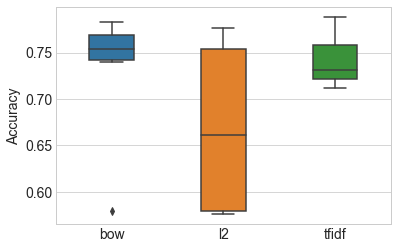

In [27]:
ax = sns.boxplot(data=search_results, width=0.4)
ax.set_ylabel('Accuracy', size=14)
ax.tick_params(labelsize=14)
plt.savefig('tfidf_gridcv_results.png')

In [35]:
m1 = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow', 
                              _C=bow_search.best_params_['C'])
m2 = simple_logistic_classify(X_tr_l2, y_tr, X_te_l2, y_te, 'l2-normalized', 
                              _C=l2_search.best_params_['C'])
m3 = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf', 
                              _C=tfidf_search.best_params_['C'])

Test score with bow features: 0.78360708021
Test score with l2-normalized features: 0.780178599904
Test score with tf-idf features: 0.788470738319


In [43]:
bow_search.cv_results_['mean_test_score']

array([ 0.57897075,  0.7518111 ,  0.78283898,  0.77381766,  0.75515992,
        0.73937261])

In [ ]:
# blobs in TextBlob also have noun phrase extraction

print([np for np in blob_df[4].noun_phrases])